# Handwritten Digit classification Using Neural Networks

 First we import tensorflow and load the dataset from tensorflow.examples.tutorial.mnist

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/mnist/", one_hot=True)

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


 Now, we will see what we got in our data,

In [2]:
print("No of images in training set {}".format(mnist.train.images.shape))
print("No of labels in training set {}".format(mnist.train.labels.shape))

print("No of images in test set {}".format(mnist.test.images.shape))
print("No of labels in test set {}".format(mnist.test.labels.shape))


No of images in training set (55000, 784)
No of labels in training set (55000, 10)
No of images in test set (10000, 784)
No of labels in test set (10000, 10)


We have 55000 images in the training set and each image is of size 784 and we have 10
labels which are actually 0 to 9. Similarly, we have 10000 images in the test set. 

Now we plot an input image to see how it looks like, 

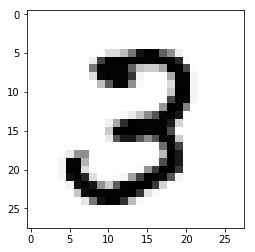

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
img1 = mnist.train.images[41].reshape(28,28)
plt.imshow(img1, cmap='Greys')

Next, we define hyperparameters which is learning rate, batch size and number of epcohs

In [4]:
learning_rate = 0.1
batch_size = 100
epochs = 10



Let us start building our network. We build the 2 layer neural network with one input
layer and one hidden layer and one output layer which predicts handwritten digit.

First, we define the placeholders for our input and output. As our input data shape is 784,
we can define input placeholder as

In [5]:
x = tf.placeholder(tf.float32, [None, 784])



What does the None implies? None specifies the number of samples (batch size) passed
which will be decided dynamically at run time.


Since we have 10 classes as output, we can define output placeholder as,

In [6]:
y = tf.placeholder(tf.float32, [None, 10])

 Now, we define the weight and bias between an input to the hidden layer as w_xh and
b_h respectively. We initialize the weight matrix with values randomly drawing from a
normal distribution with standard deviation of 0.03.

In [7]:
w_ih = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='w_ih')
b_h = tf.Variable(tf.random_normal([300]), name='b_h')

 Next, we define the weights and bias between our hidden layer to the output layer as w_hy
and b_y respectively.

In [8]:
w_hy = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='w_hy')
b_y = tf.Variable(tf.random_normal([10]), name='b_y')

Let us perform the forward propagation now, recall the steps we peformed in forward
propagation. 

In [9]:
z1 = tf.add(tf.matmul(x, w_ih), b_h)
a1 = tf.nn.relu(z1)
z2 = tf.add(tf.matmul(a1, w_hy), b_y)
yhat = tf.nn.softmax(z2)

 We define our cost function cross entropy loss as,

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(yhat), reduction_indices=[1]))

Our objective is to minimize the cost function. We can minimize the cost function by
propagating the network backward and perform gradient descent. With tensorflow we
don't have to manually calculate the gradients, we can use tensorflow's built in gradient
descent optimizer function as,

In [11]:
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

To evaluate our model, we will calculate accuracy as follows,

In [12]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(yhat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

 As we know that tensorflow runs by building the computation graph, whatever we have
written so far, will actually run only if we start the tensorflow session. So let's do that.

First, initialize tensorflow variables,

In [13]:
init_op = tf.global_variables_initializer()

 Now start the tensorflow session and start training the model. 

In [ ]:
with tf.Session() as sess:
   sess.run(init_op)
   total_batch = int(len(mnist.train.labels) / batch_size)
    
   for epoch in range(epochs):
        avg_cost = 0
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            
            _, c = sess.run([optimiser, cross_entropy], 
                         feed_dict={x: batch_x, y: batch_y})
            
            avg_cost += c / total_batch
            
        print("Epoch:", (epoch + 1), "cost =""{:.3f}".format(avg_cost))
        
   print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

('Epoch:', 1, 'cost =0.541')
('Epoch:', 2, 'cost =0.292')
('Epoch:', 3, 'cost =0.238')
('Epoch:', 4, 'cost =0.196')
('Epoch:', 5, 'cost =0.165')
('Epoch:', 6, 'cost =0.142')
('Epoch:', 7, 'cost =0.124')
('Epoch:', 8, 'cost =0.111')
('Epoch:', 9, 'cost =0.100')
('Epoch:', 10, 'cost =0.090')
